## This code applies the perceptron classification algorithm to the iris data set.The weights used for computing the activation function are calculated using the least-square method.This method is different from Rosenblatt's original perceptron rule where the weights are calculated recursively.

## For more information about the implementation of Rosenblatt's perceptron algorithm, see the following book:"Python Machine Learning" by Sebastian Raschka 

## Created on Tue Jul 24 12:36:55 2018

## @author: Benjamin Tayo



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
class Perceptron(object):
    """Perceptron classifier using least-square method to calculate weights.
      
    Attributes
    -----------
    w : 1d-array
        Weights after fitting.
    """   
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self.w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
        return self
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(np.dot(X,self.w) >= 0.0, 1, -1)  

## Import Iris data set


       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


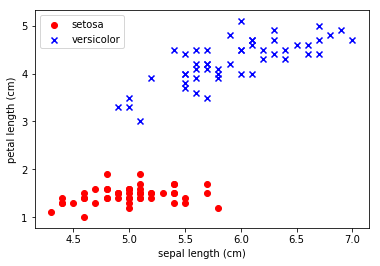

In [2]:
df = pd.read_csv('iris.data.csv', header=None)
print(df.tail())
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, 0:4].values
plt.scatter(X[:50, 0], X[:50, 2],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 2],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

## Training and Testing of the model

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
ppn = Perceptron()
ppn.fit(X_train,y_train)
y_pred=ppn.predict(X_test)
accuracy = 100*np.sum(y_pred==y_test)/len(y_test)
print("accuracy of the model:= " + str(accuracy))

accuracy of the model:= 100.0
